# Ex. 1

In [9]:
library(mlbench)
data(Glass)
#data structure and missing values
str(Glass)

'data.frame':	214 obs. of  10 variables:
 $ RI  : num  1.52 1.52 1.52 1.52 1.52 ...
 $ Na  : num  13.6 13.9 13.5 13.2 13.3 ...
 $ Mg  : num  4.49 3.6 3.55 3.69 3.62 3.61 3.6 3.61 3.58 3.6 ...
 $ Al  : num  1.1 1.36 1.54 1.29 1.24 1.62 1.14 1.05 1.37 1.36 ...
 $ Si  : num  71.8 72.7 73 72.6 73.1 ...
 $ K   : num  0.06 0.48 0.39 0.57 0.55 0.64 0.58 0.57 0.56 0.57 ...
 $ Ca  : num  8.75 7.83 7.78 8.22 8.07 8.07 8.17 8.24 8.3 8.4 ...
 $ Ba  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Fe  : num  0 0 0 0 0 0.26 0 0 0 0.11 ...
 $ Type: Factor w/ 6 levels "1","2","3","5",..: 1 1 1 1 1 1 1 1 1 1 ...


>(a) Using visualizations, explore the predictor variables to understand their distributions as well as the relationships between predictors


Attaching package: 'reshape'

The following object is masked from 'package:Matrix':

    expand



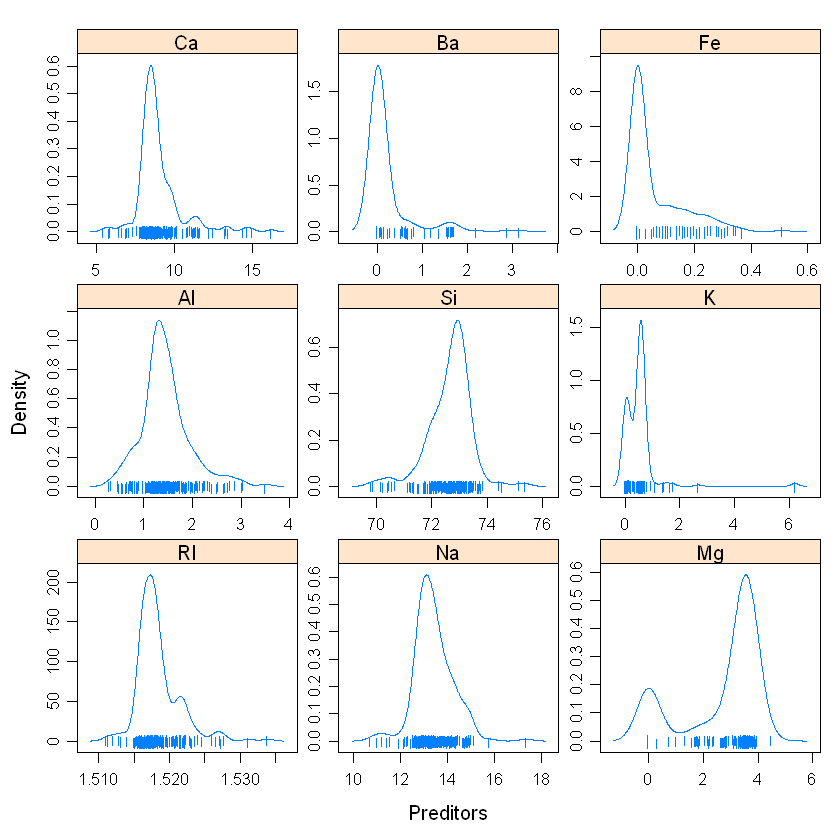

In [10]:
#distribution
library(reshape)
meltedGlass <- melt(Glass,id.vars="Type")

library(lattice)
densityplot(~value|variable,data=meltedGlass,
            scales = list(x=list(relation="free"),y=list(relation = "free")),
           adjust=1.25,pch="|",xlab="Preditors")

> (b) Does there appear to be any outliers in the data? Are predictors skewed

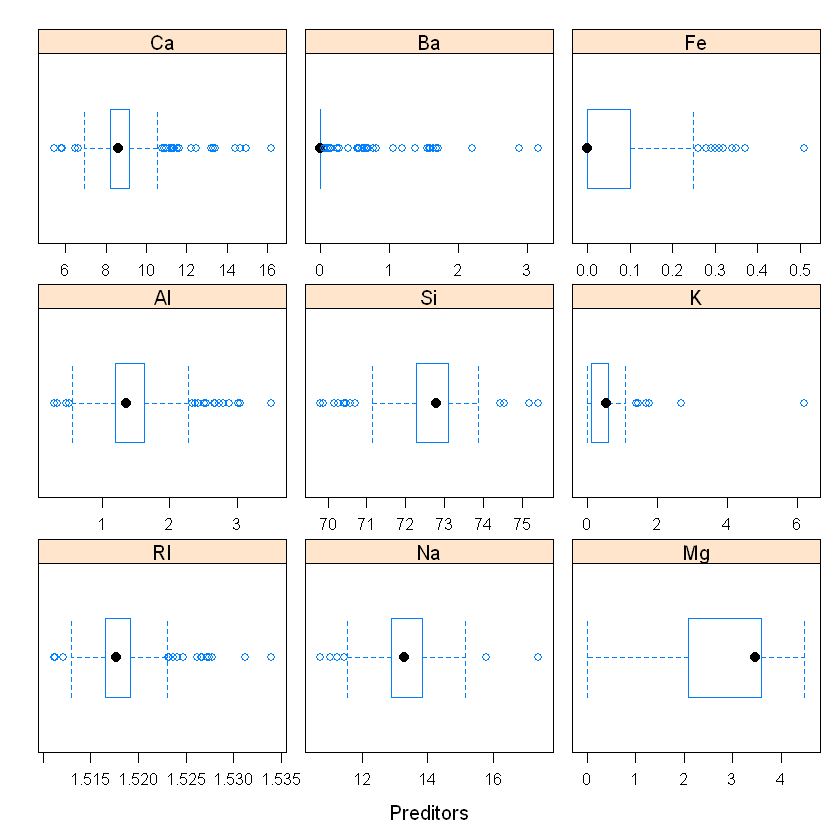

In [11]:
#outliners
bwplot(~value|variable,data=meltedGlass,
            scales = list(x=list(relation="free"),y=list(relation = "free")),
           xlab="Preditors")

Warning message:
"package 'ggcorrplot' was built under R version 3.5.1"

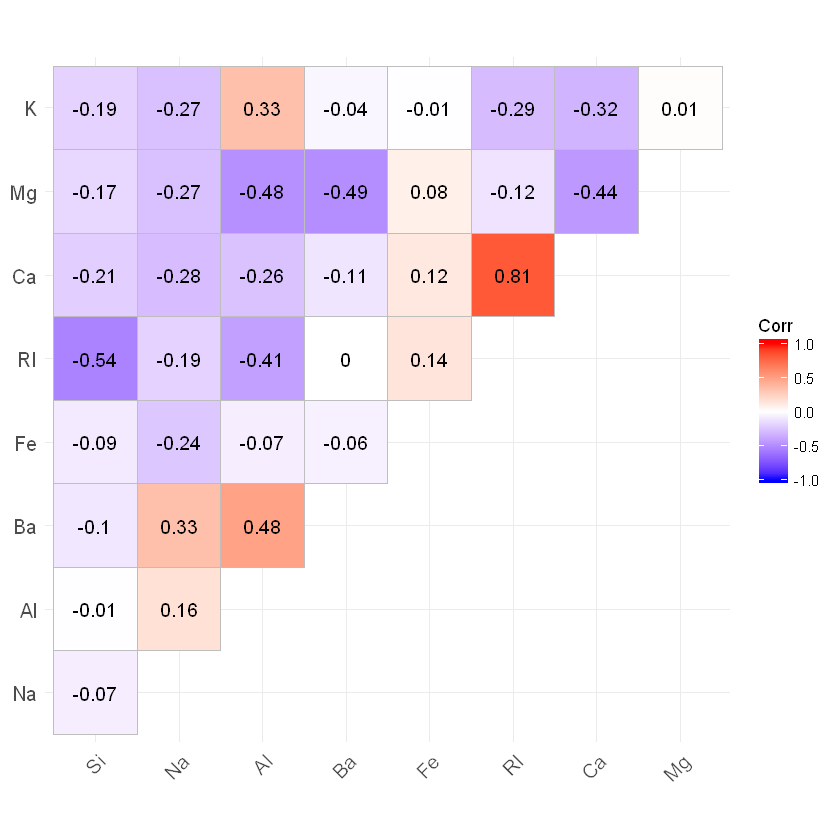

In [12]:
#cor
library(ggcorrplot)
ggcorrplot(round(cor(Glass[,1:9]),2), hc.order = TRUE, type = "upper", lab = TRUE)

Loading required package: carData


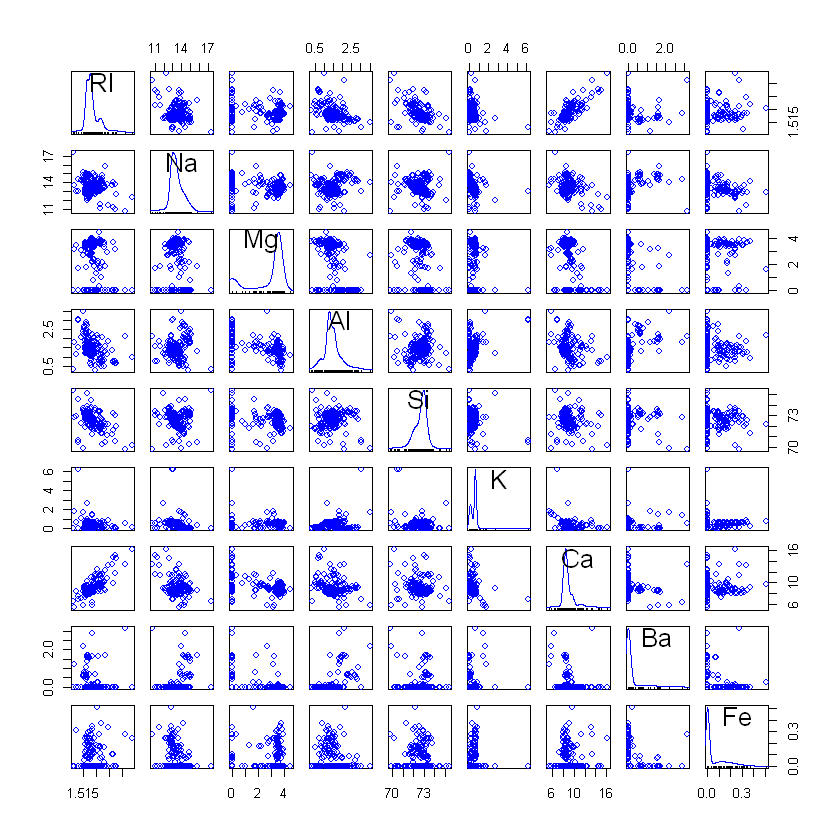

In [13]:
library(car)
spm(Glass[,1:9],smooth=F,regLine = F)

>(c) Are there any relevant transformations of one or more predictors that might improve the
classification model?

In [14]:
#For skewness, first note that several predictors have values of zer
library(caret)
trans_yj <- preProcess(Glass[,-10],method="YeoJohnson")
glass_yj <- predict(trans_yj,newdata = Glass[,-10])
glass_mlt <- melt(glass_yj)

Using  as id variables


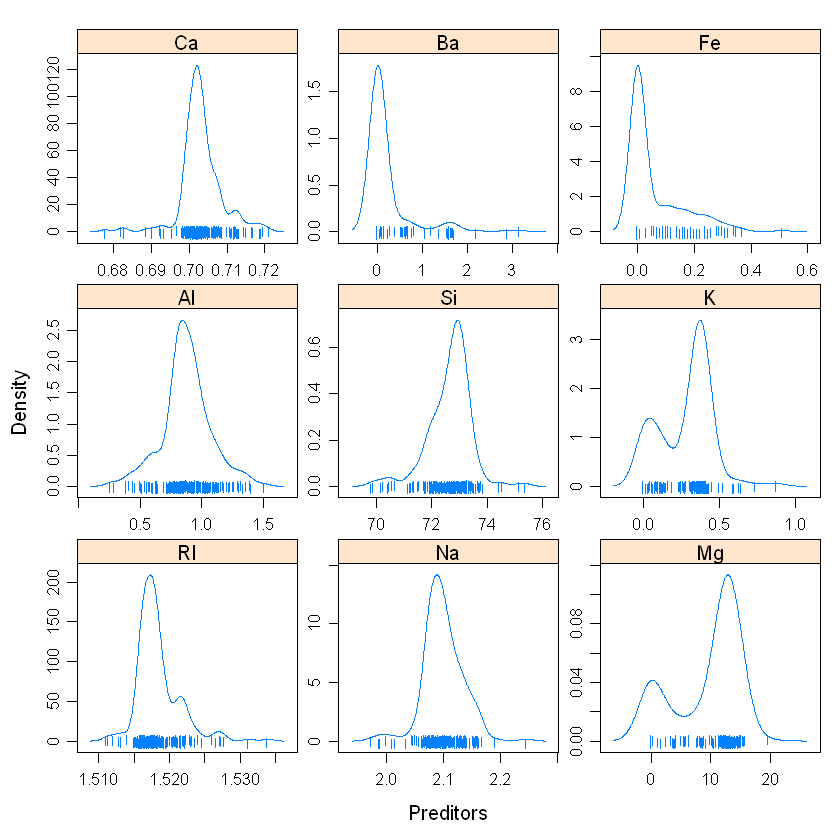

In [15]:
densityplot(~value|variable,data=glass_mlt,
            scales = list(x=list(relation="free"),y=list(relation = "free")),
           adjust=1.25,pch="|",xlab="Preditors")

In [16]:
trans_scaling <- preProcess(Glass[,-10],method = c("center","scale"))
glass_scaling <- predict(trans_scaling,newdata = Glass[,-10])
glass_spatial <- spatialSign(glass_scaling)
#https://github.com/topepo/caret/blob/master/pkg/caret/R/spatialSign.R
#https://stackoverflow.com/questions/28194655/r-is-spatialsign-function-useful-for-identifying-outliers

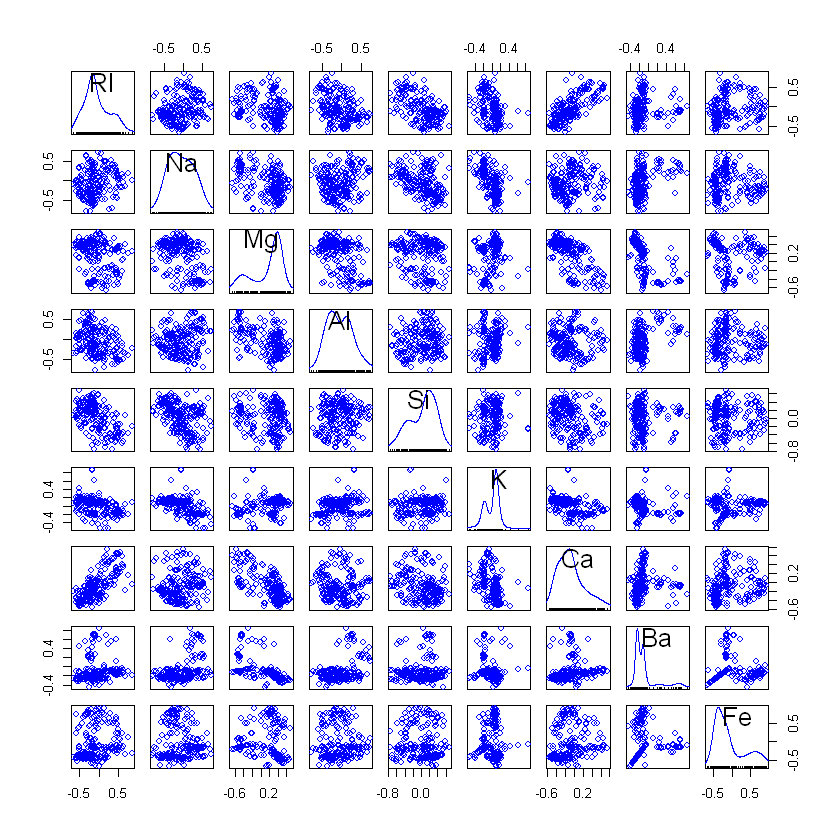

In [17]:
#splom(~glass_spatial,pch=16,col=rgb(.2,.2,.2,.4),cex=.5)

# df_mlt <- melt(data.frame(glass_spatial))
# densityplot(~value|variable,data=df_mlt,
#             scales = list(x=list(relation="free"),y=list(relation = "free")),
#            adjust=1.25,pch="|",xlab="Preditors")

spm(glass_spatial,smooth=F,regLine = F)

# Ex. 2
>(a) Investigate the frequency distributions for the categorical predictors. Are the distributions
likely to cause issues for models.

In [18]:
library(mlbench)
data(Soybean)
str(Soybean)

'data.frame':	683 obs. of  36 variables:
 $ Class          : Factor w/ 19 levels "2-4-d-injury",..: 11 11 11 11 11 11 11 11 11 11 ...
 $ date           : Factor w/ 7 levels "0","1","2","3",..: 7 5 4 4 7 6 6 5 7 5 ...
 $ plant.stand    : Ord.factor w/ 2 levels "0"<"1": 1 1 1 1 1 1 1 1 1 1 ...
 $ precip         : Ord.factor w/ 3 levels "0"<"1"<"2": 3 3 3 3 3 3 3 3 3 3 ...
 $ temp           : Ord.factor w/ 3 levels "0"<"1"<"2": 2 2 2 2 2 2 2 2 2 2 ...
 $ hail           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 1 ...
 $ crop.hist      : Factor w/ 4 levels "0","1","2","3": 2 3 2 2 3 4 3 2 4 3 ...
 $ area.dam       : Factor w/ 4 levels "0","1","2","3": 2 1 1 1 1 1 1 1 1 1 ...
 $ sever          : Factor w/ 3 levels "0","1","2": 2 3 3 3 2 2 2 2 2 3 ...
 $ seed.tmt       : Factor w/ 3 levels "0","1","2": 1 2 2 1 1 1 2 1 2 1 ...
 $ germ           : Ord.factor w/ 3 levels "0"<"1"<"2": 1 2 3 2 3 2 1 3 2 3 ...
 $ plant.growth   : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ leaves  

Warning message:
"package 'VIM' was built under R version 3.5.1"Loading required package: colorspace
Loading required package: grid
Loading required package: data.table

Attaching package: 'data.table'

The following object is masked from 'package:reshape':

    melt

VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.

Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues

Attaching package: 'VIM'

The following object is masked from 'package:datasets':

    sleep



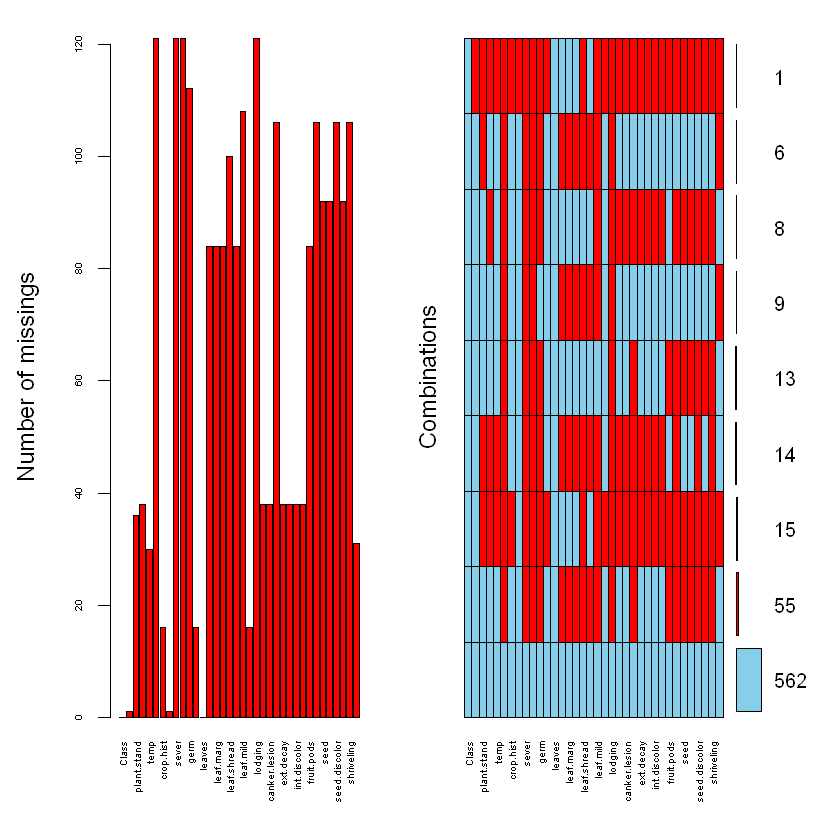

In [19]:
library(VIM)
aggr(Soybean, cex.axis=.5,prop=F,number=T)

In [20]:
table(Soybean$temp,useNA = "always")
#or we could recode using car
df <- Soybean
library(car)
df$temp <- recode(df$temp,
                 "0 = 'low'; 1 = 'norm'; 2 = 'high'; NA = 'missing'",
                 levels = c("low", "norm", "high", "missing"))
table(df$temp)


   0    1    2 <NA> 
  80  374  199   30 


    low    norm    high missing 
     80     374     199      30 

In [21]:
table(Soybean$date,useNA = "always")
df$date <- recode(df$date,
                         "0 ='apr';1='may';2='june';3='july';4='aug';5='sept';6='oct';NA = 'missing'",
                         levels = c("apr", "may", "june", "july", "aug", "sept", "missing"))
table(df$date)


   0    1    2    3    4    5    6 <NA> 
  26   75   93  118  131  149   90    1 


    apr     may    june    july     aug    sept missing 
     26      75      93     118     131     149       1 

In [22]:
table(Soybean$precip, useNA = "always")

df$precip <- recode(df$precip,
"0 = 'low'; 1 = 'norm'; 2 = 'high'; NA = 'missing'",
levels = c("low", "norm", "high", "missing"))
table(df$precip)


   0    1    2 <NA> 
  74  112  459   38 


    low    norm    high missing 
     74     112     459      38 

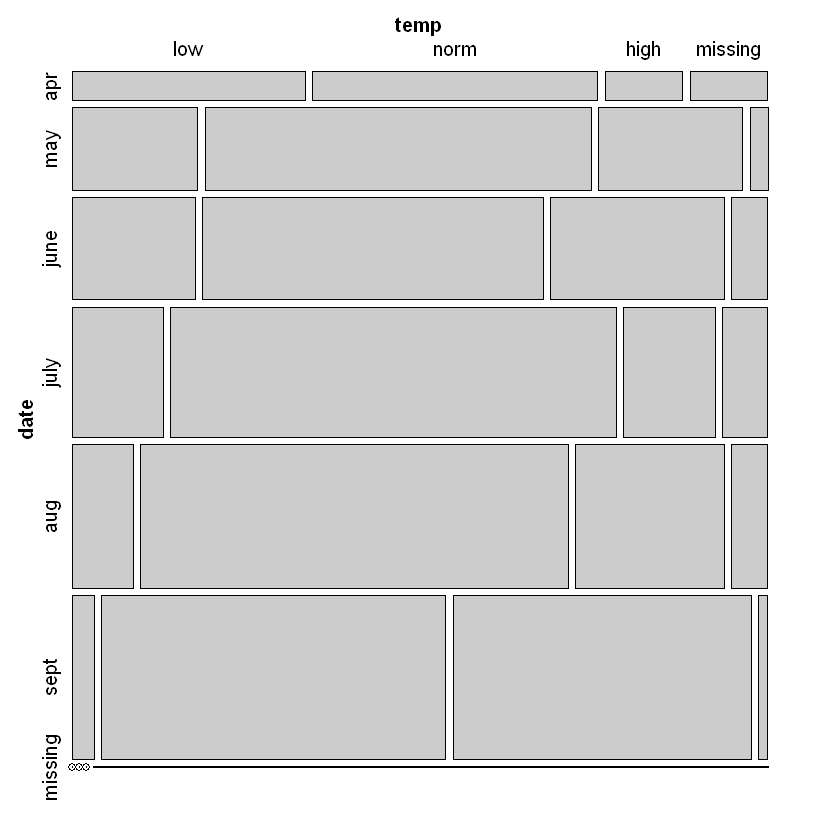

In [23]:
library(vcd)
mosaic(~date+temp,data=df)

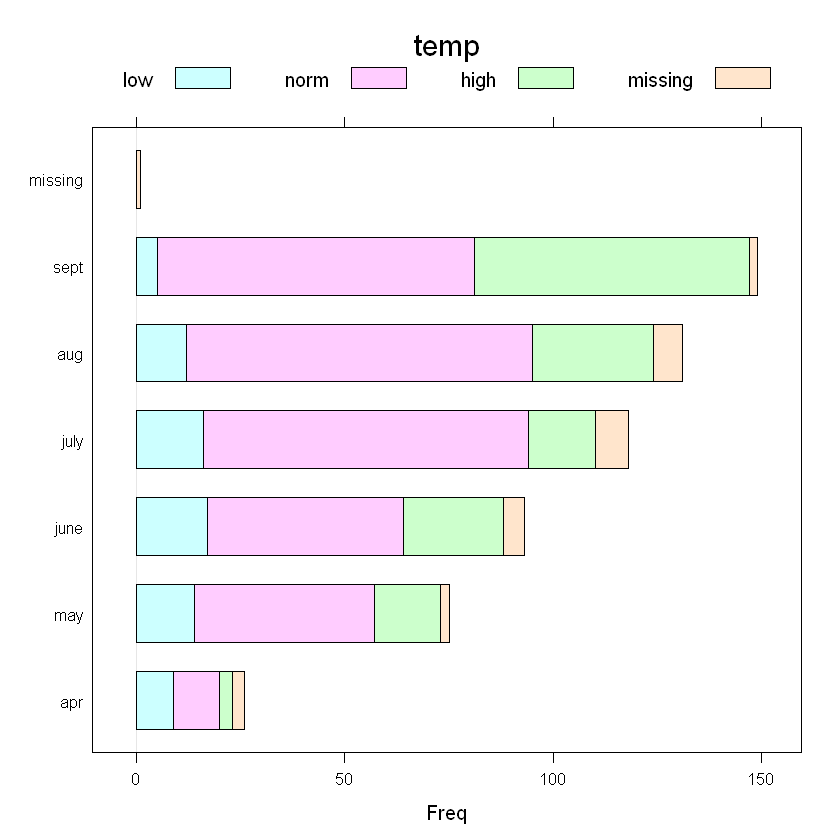

In [24]:
library(lattice)
barchart(table(df$date,df$temp),auto.key=list(columns=4,title="temp"))

In [25]:
table(Soybean$Class,complete.cases(Soybean))

                             
                              FALSE TRUE
  2-4-d-injury                   16    0
  alternarialeaf-spot             0   91
  anthracnose                     0   44
  bacterial-blight                0   20
  bacterial-pustule               0   20
  brown-spot                      0   92
  brown-stem-rot                  0   44
  charcoal-rot                    0   20
  cyst-nematode                  14    0
  diaporthe-pod-&-stem-blight    15    0
  diaporthe-stem-canker           0   20
  downy-mildew                    0   20
  frog-eye-leaf-spot              0   91
  herbicide-injury                8    0
  phyllosticta-leaf-spot          0   20
  phytophthora-rot               68   20
  powdery-mildew                  0   20
  purple-seed-stain               0   20
  rhizoctonia-root-rot            0   20

In [26]:
hasMissing <- unlist(lapply(Soybean,function(x) any(is.na(x))))
hasMissing<- names(hasMissing)[hasMissing]
head(hasMissing)

[1] "date"        "plant.stand" "precip"      "temp"        "hail"       
[6] "crop.hist"

>(b) Roughly 18% of the data are missing. Are there particular predictors that are more likely
to be missing? Is the pattern of missing data related to the classes?

In [27]:
byPredByClass <- apply(Soybean[, hasMissing], 2,
                       function(x, y) {
                           tab <- table(is.na(x), y)
                           tab[2,]/apply(tab, 2, sum)
                       },
                       y = Soybean$Class)

byPredByClass <- byPredByClass[apply(byPredByClass, 1, sum) > 0,]
byPredByClass <- byPredByClass[, apply(byPredByClass, 2, sum) > 0]
t(byPredByClass)

,2-4-d-injury,cyst-nematode,diaporthe-pod-&-stem-blight,herbicide-injury,phytophthora-rot
date,0.0625,0,0.0,0,0.0000000
plant.stand,1.0000,1,0.4,0,0.0000000
precip,1.0000,1,0.0,1,0.0000000
temp,1.0000,1,0.0,0,0.0000000
hail,1.0000,1,1.0,1,0.7727273
crop.hist,1.0000,0,0.0,0,0.0000000
area.dam,0.0625,0,0.0,0,0.0000000
sever,1.0000,1,1.0,1,0.7727273
seed.tmt,1.0000,1,1.0,1,0.7727273
germ,1.0000,1,0.4,1,0.7727273


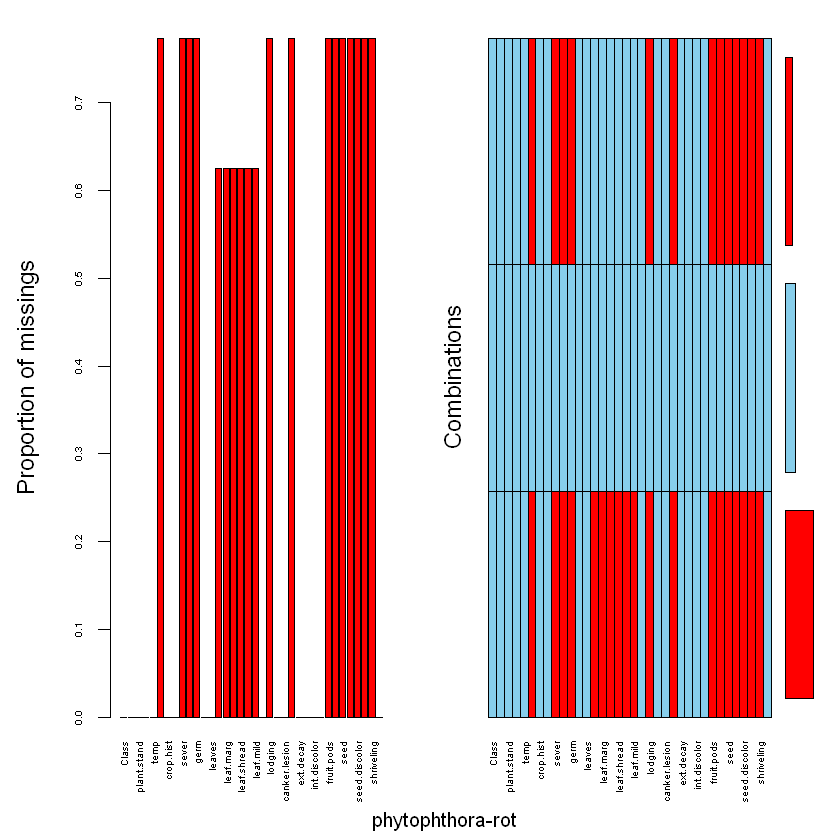

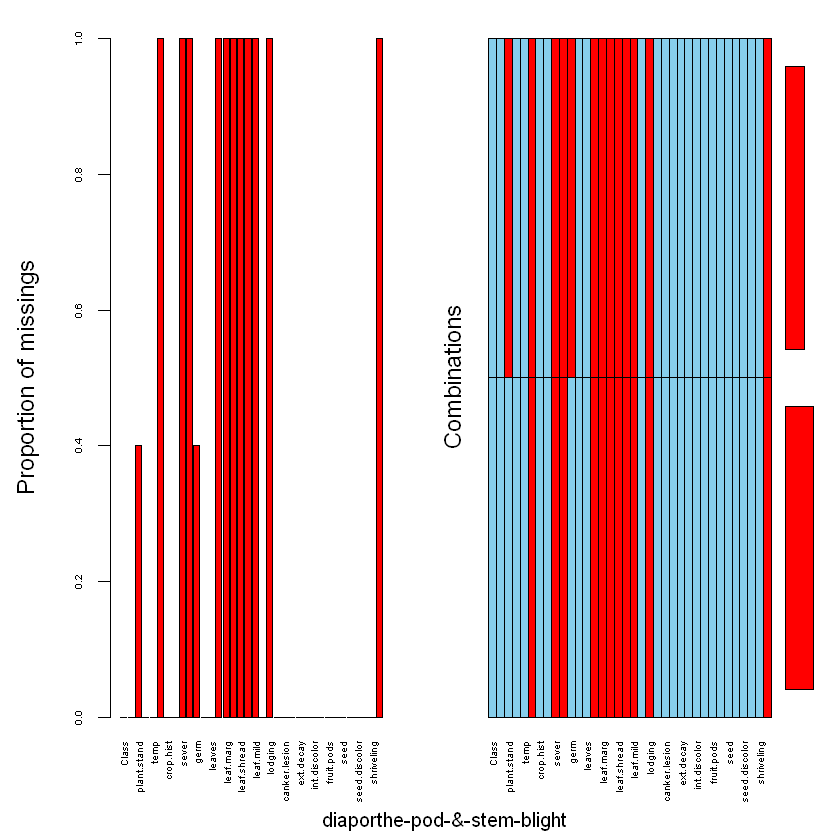

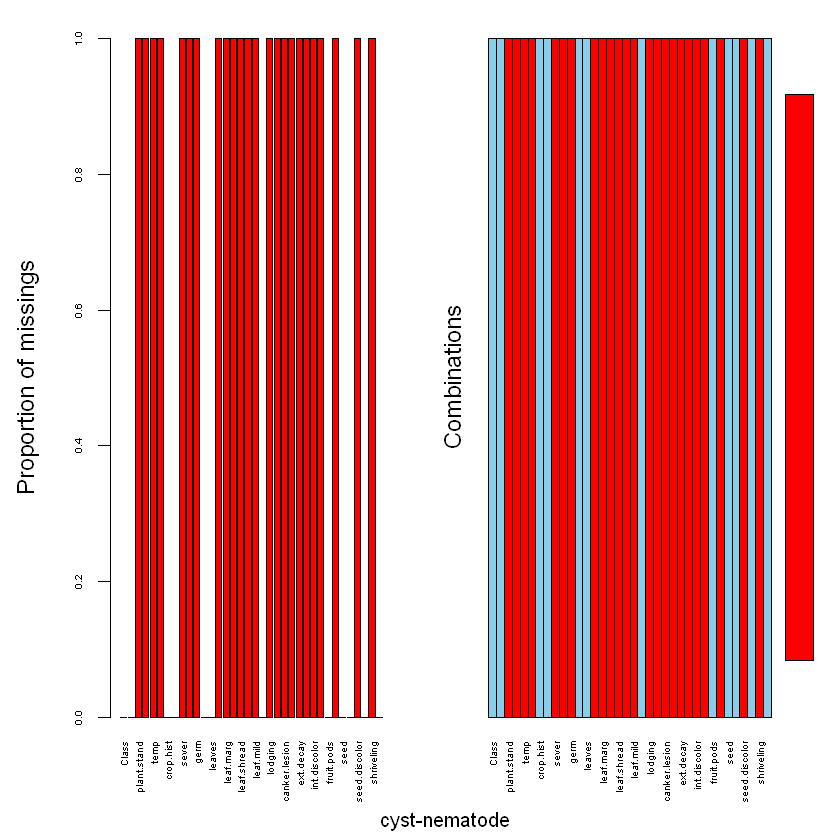

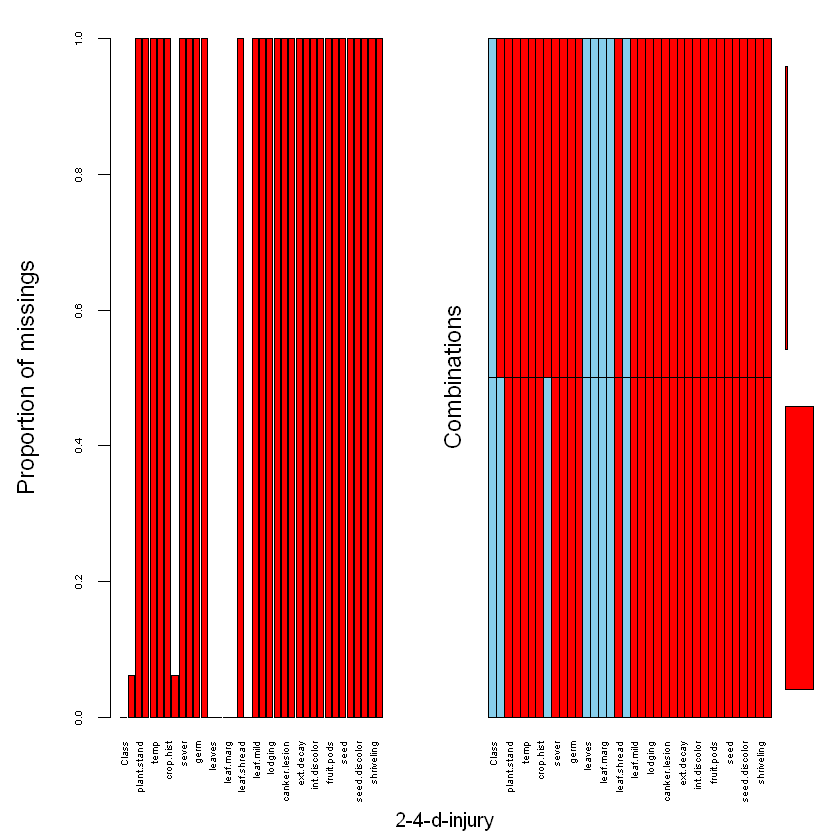

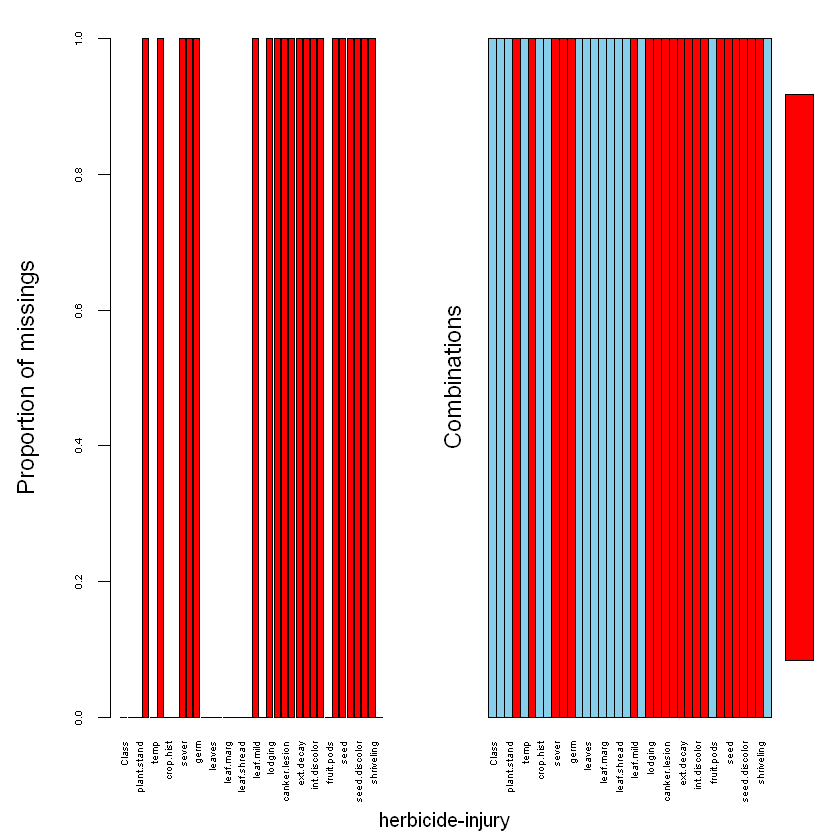

In [28]:
list <-which(rowSums(is.na(Soybean)) > 0) 
Soybean_NA <- Soybean[list,]
cols <- unique(Soybean_NA$Class)
for (i in cols){
   aggr(Soybean[Soybean$Class==i,],cex.axis=.5)
    title(sub=i)
}

>(c) Develop a strategy for dealing with the missing data, either by eliminating predictors or
imputation

In [29]:
orderedVars <- unlist(lapply(Soybean,is.ordered))
orderedVars <- names(orderedVars[orderedVars])

In [30]:
#bypass problem of missing data by removing  offending  classes
completeClasses <- as.character(unique(Soybean$Class[complete.cases(Soybean)]))
df <- subset(Soybean,Class %in% completeClasses)
for (i in orderedVars) df[,i] <- factor(as.character(df[,i]))

In [31]:
## Use dummyVars to generate the binary predictors
library(caret)
dummyInfo <- dummyVars(Class ~.,data=df)
dummies <- predict(dummyInfo,df)

Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
"variable 'Class' is not a factor"

In [32]:
predDistInfo <- nearZeroVar(dummies,saveMetrics = T)
head(predDistInfo)

,freqRatio,percentUnique,zeroVar,nzv
date.0,30.500000,0.3174603,FALSE,TRUE
date.1,8.264706,0.3174603,FALSE,FALSE
date.2,6.325581,0.3174603,FALSE,FALSE
date.3,4.727273,0.3174603,FALSE,FALSE
date.4,4.080645,0.3174603,FALSE,FALSE
date.5,3.500000,0.3174603,FALSE,FALSE


In [33]:
sum(predDistInfo$nzv)
mean(predDistInfo$nzv)
#http://stefvanbuuren.github.io/mice/

[1] 16

[1] 0.1616162

# Ex. 3
>(b) Do any of the individual predictors have degenerate distributions?

In [34]:
library(caret)
data(BloodBrain)
?BloodBrain
#The vector logBBB contains the log concentration ratio and the data fame bbbDescr contains the descriptor values.

Warning message in read.dcf(file.path(p, "DESCRIPTION"), c("Package", "Version")):
"无法打开压缩文件'D:/R/R-3.5.0/library/nlme/DESCRIPTION'，可能是因为'No such file or directory'"Warning message in find.package(if (is.null(package)) loadedNamespaces() else package, :
"there is no package called 'nlme'"

In [35]:
str(bbbDescr)
str(logBBB)

'data.frame':	208 obs. of  134 variables:
 $ tpsa                : num  12 49.3 50.5 37.4 37.4 ...
 $ nbasic              : int  1 0 1 0 1 1 1 1 1 1 ...
 $ negative            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ vsa_hyd             : num  167.1 92.6 295.2 319.1 299.7 ...
 $ a_aro               : int  0 6 15 15 12 11 6 12 12 6 ...
 $ weight              : num  156 151 366 383 326 ...
 $ peoe_vsa.0          : num  76.9 38.2 58.1 62.2 74.8 ...
 $ peoe_vsa.1          : num  43.4 25.5 124.7 124.7 118 ...
 $ peoe_vsa.2          : num  0 0 21.7 13.2 33 ...
 $ peoe_vsa.3          : num  0 8.62 8.62 21.79 0 ...
 $ peoe_vsa.4          : num  0 23.3 17.4 0 0 ...
 $ peoe_vsa.5          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ peoe_vsa.6          : num  17.24 0 8.62 8.62 8.62 ...
 $ peoe_vsa.0.1        : num  18.7 49 83.8 83.8 83.8 ...
 $ peoe_vsa.1.1        : num  43.5 0 49 68.8 36.8 ...
 $ peoe_vsa.2.1        : num  0 0 0 0 0 ...
 $ peoe_vsa.3.1        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ peoe_vsa.4.1       

In [36]:
#is there any missing values?
na_col <- unlist(lapply(bbbDescr,function(x) any(is.na(x))))
names(na_col)[na_col]

character(0)

[Degenerate distribution](https://en.wikipedia.org/wiki/Degenerate_distribution)
>  If the degenerate distribution is univariate (involving only a single random variable) it is a deterministic distribution and takes only a **single value**.

In [37]:
predictorInfo <- nearZeroVar(bbbDescr,saveMetrics = T)
head(predictorInfo)

,freqRatio,percentUnique,zeroVar,nzv
tpsa,2.142857,61.5384615,FALSE,FALSE
nbasic,1.736842,0.9615385,FALSE,FALSE
negative,207.000000,0.9615385,FALSE,TRUE
vsa_hyd,1.000000,93.2692308,FALSE,FALSE
a_aro,1.188679,5.7692308,FALSE,FALSE
weight,1.000000,91.8269231,FALSE,FALSE


In [38]:
rownames(predictorInfo)[predictorInfo$nzv]

[1] "negative"     "peoe_vsa.2.1" "peoe_vsa.3.1" "a_acid"       "vsa_acid"    
[6] "frac.anion7." "alert"


Attaching package: 'reshape2'

The following objects are masked from 'package:data.table':

    dcast, melt

The following objects are masked from 'package:reshape':

    colsplit, melt, recast

No id variables; using all as measure variables


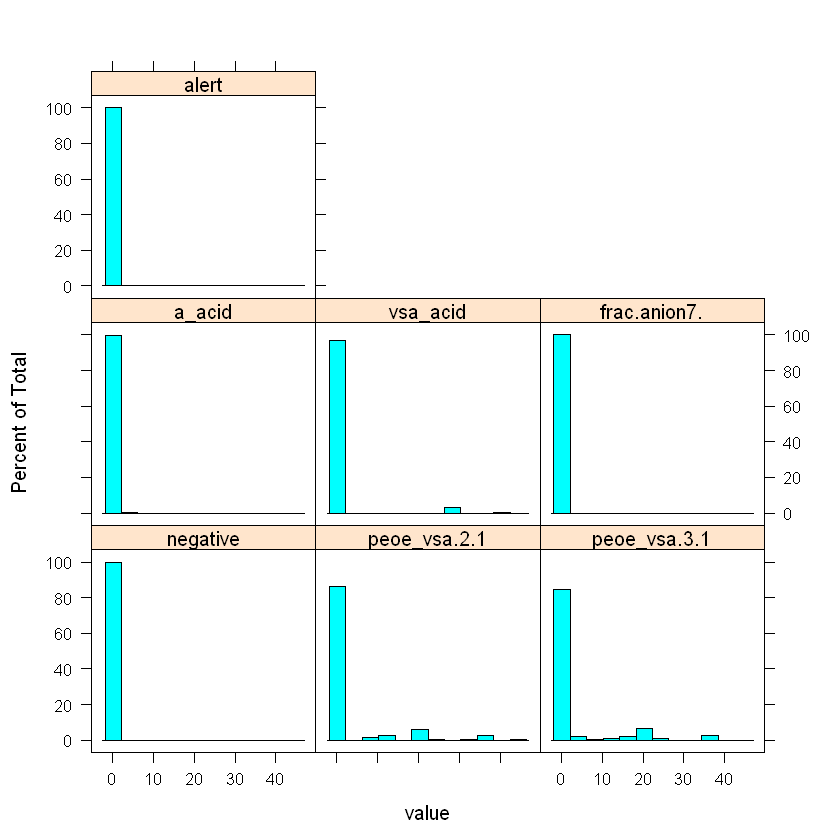

In [39]:
library(lattice)
library(reshape2)
bb_nzv <- bbbDescr[,predictorInfo$nzv]
bb_nzv <- melt(bb_nzv)
histogram(~ value|variable, data = bb_nzv)

In [40]:
table(bbbDescr$a_acid)


  0   2   3 
201   6   1 

In [41]:
#get rid of nzv
filter1 <- bbbDescr[,!predictorInfo$nzv]
ncol(filter1)

[1] 127

In [42]:
#predictors distribution
set.seed(532)
sampled1 <- filter1[,sample(1:ncol(filter1),8)]
names(sampled1)

[1] "o_sp3"         "adistm"        "peoe_vsa.6"    "o_sp2"        
[5] "peoe_vsa.3"    "fpsa3"         "frac.cation7." "wpsa2"

No id variables; using all as measure variables


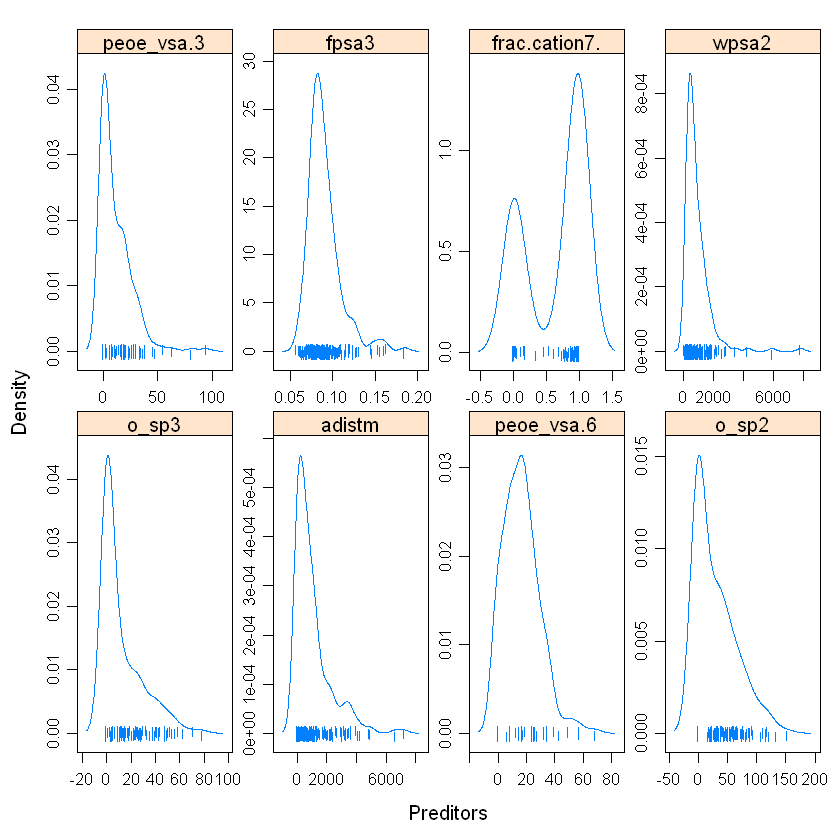

In [43]:
bb_mlt <- melt(sampled1)
densityplot(~value|variable,data=bb_mlt,
            scales = list(x=list(relation="free"),y=list(relation = "free")),
           adjust=1.25,pch="|",xlab="Preditors",layout=c(4,2))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.1203  0.2670  0.8902  0.8721  1.6176  5.3313 

tcpa                wpsa2                inthb 
         5.331287599          4.042276461          3.966833793 
            vsa_base                ppsa2                dpsa2 
         2.865660753          2.818706975          2.705874340 
             vsa_don             smr_vsa4  rule.of.5violations 
         2.442425356          2.295053447          2.204565373 
          peoe_vsa.3               adistd           peoe_vsa.2 
         2.160150767          2.146570213          2.092669833 
              adistm           slogp_vsa6             psa_npsa 
         2.042895100          2.037382112          2.006985957 
               n_sp3                wpsa3                n_sp2 
         1.977848608          1.952013054          1.951156924 
                tcnp           slogp_vsa4         peoe_vsa.6.1 
         1.924435061          1.913004974          1.903846447 
               scdh1                 wncs              vsa_pol 
         1.874749830          1.833529495          1.820486490 
               fpsa3                scdh3         peoe_vsa.4.1 
         1.776911526          1.773906989          1.724850876 
          peoe_vsa.5                sadh1                sadh3 
         1.705379307          1.703995953          1.676933709 
               fpsa2  sum_absolute_charge           peoe_vsa.4 
         1.625538948          1.622202796          1.613070012 
            smr_vsa2                chdh1                o_sp3 
         1.603940411          1.587489161          1.558286538 
                wpcs                 rdta             smr_vsa6 
         1.556870859          1.505622700          1.492249514 
               wpsa1                chdh3                 lumo 
         1.416896579          1.396397440          1.393274270 
               ppsa3                hbdnr                 ctdh 
         1.387413060          1.284941582          1.284941582 
               dpsa3               a_base           slogp_vsa3 
         1.246543932          1.217865123          1.196832307 
          slogp_vsa2 most_positive_charge         peoe_vsa.5.1 
         1.174675156          1.165281839          1.133007545 
            hardness                 rncg                o_sp2 
         1.117055715          1.113213410          1.095833527 
       dipole_moment           slogp_vsa8                saaa3 
         1.043701425          1.040789700          1.024869534 
            smr_vsa0           polar_area         peoe_vsa.1.1 
         0.974113554          0.947056828          0.938099069 
            smr_vsa1           peoe_vsa.6           slogp_vsa5 
         0.912143913          0.902619064          0.895647806 
                tcsa           slogp_vsa1                 tpsa 
         0.890180483          0.873943667          0.857089968 
          slogp_vsa0         peoe_vsa.0.1               tpsa.1 
         0.848166238          0.822162070          0.814032902 
                 prx             smr_vsa3                wnsa1 
         0.761393829          0.722150890          0.670021042 
              volume              nocount                saaa1 
         0.633549413          0.618806232          0.604485082 
             vsa_acc                ppsa1                fnsa1 
         0.601382734          0.587872948          0.580832409 
              nbasic       rotatablebonds         surface_area 
         0.555078979          0.553310234          0.545575922 
                  mw               weight           slogp_vsa9 
         0.510251422          0.508677306          0.497251408 
               saaa2            vsa_other                 rpcg 
         0.489785061          0.460574619          0.458486206 
          andrewbind              ovality              vsa_hyd 
         0.424637751          0.412331576          0.407105280 
               a_acc             smr_vsa5                 ctaa 
         0.382212095          0.377594556          0.310976896 
            smr_vsa7                  pol       

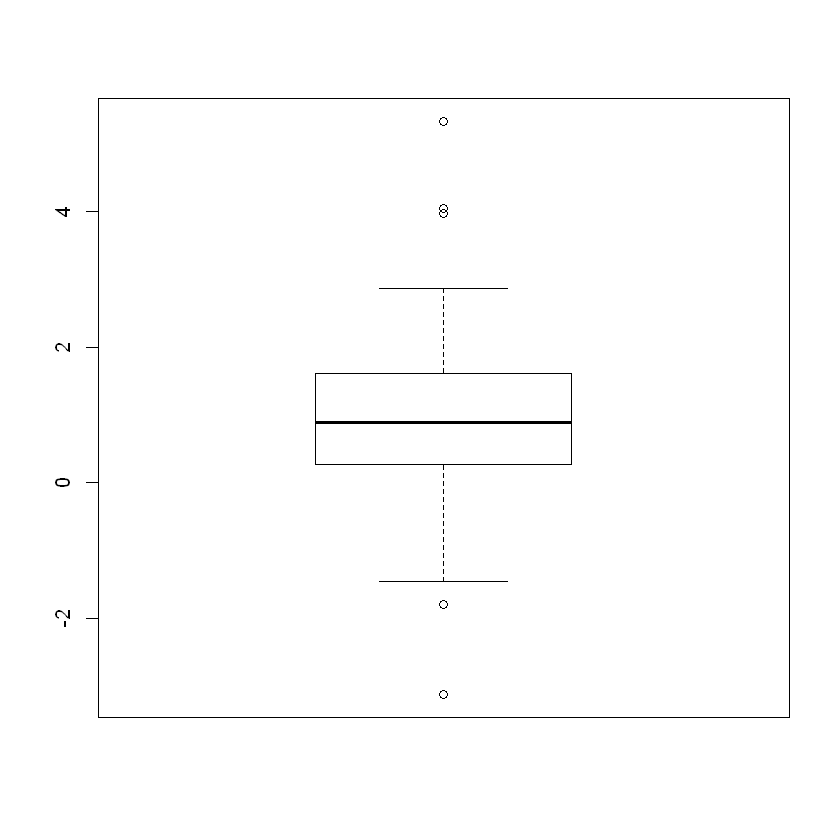

In [44]:
library(e1071)
skew <- apply(filter1,2,skewness)
summary(skew)
boxplot(skew)
sort(skew,decreasing = T)

In [45]:
trans_yj <- preProcess(filter1,method="YeoJohnson")
transformed <- predict(trans_yj,newdata = filter1)
sample2 <- transformed[,names(sampled1)]

No id variables; using all as measure variables


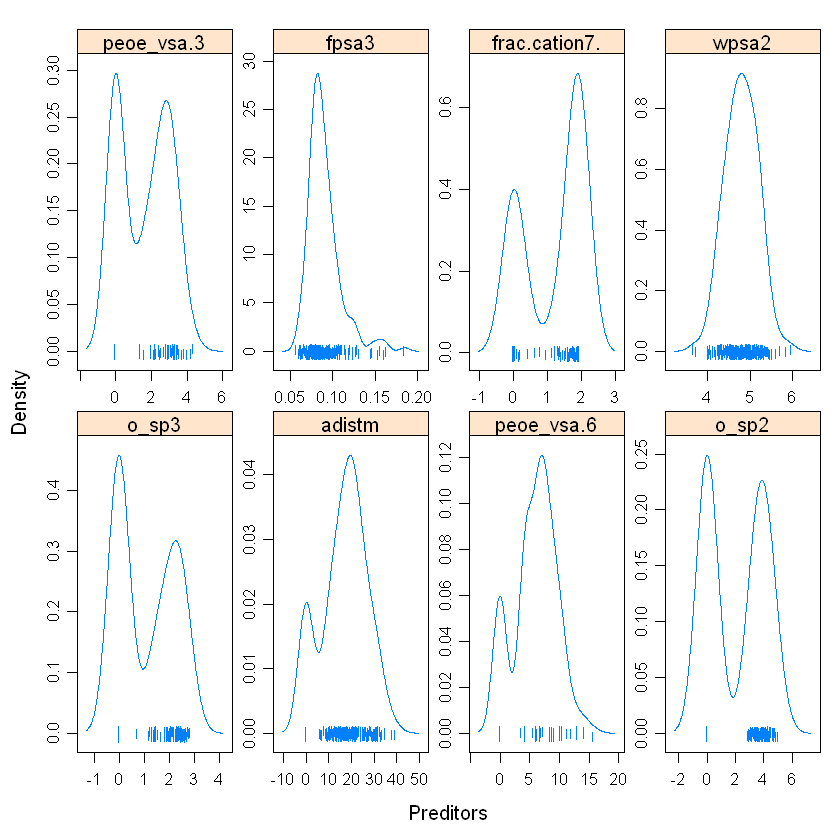

In [46]:
sample2_mlt <- melt(sample2)
densityplot(~value|variable,data=sample2_mlt,
            scales = list(x=list(relation="free"),y=list(relation = "free")),
           adjust=1.25,pch="|",xlab="Preditors",layout=c(4,2))

> (c) Generally speaking, are there strong relationships between the predictor data? If so, how
could correlations in the predictor set be reduced? Does this have a dramatic effect on the
number of predictors available for modeling?

>**Since the correlation is a function of squared values of the predictors, the samples in the tails of the predictor distributions may have a significant effect on the correlation structure. **

In [47]:
rawCorr <- cor(filter1)
transCorr <- cor(transformed)
ssCorr <- cor(spatialSign(scale(filter1)))

Warning message:
"package 'corrplot' was built under R version 3.5.1"corrplot 0.84 loaded


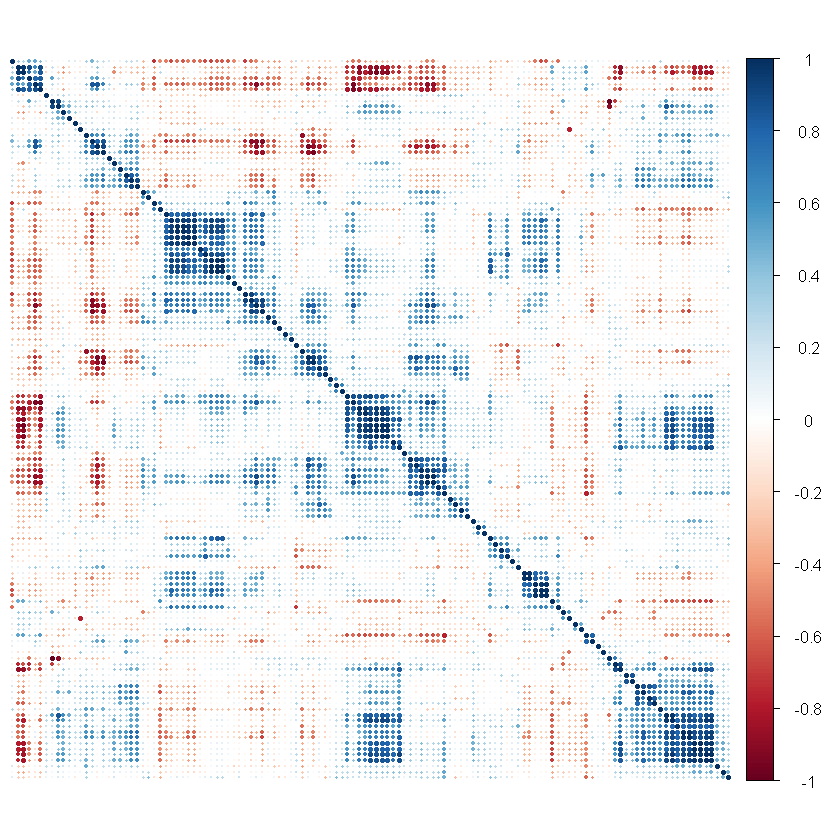

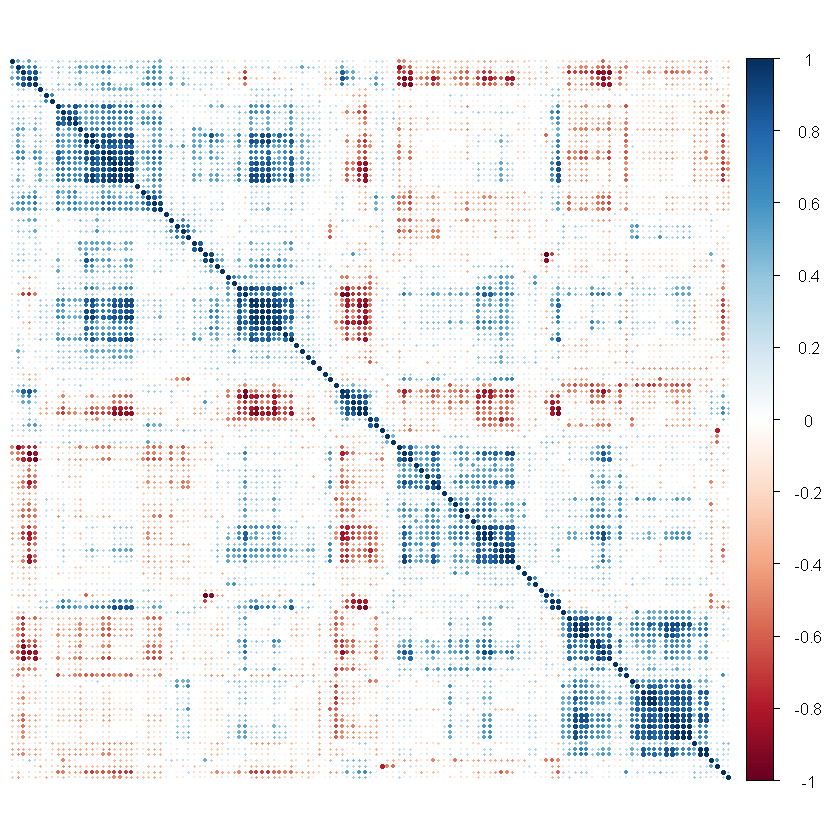

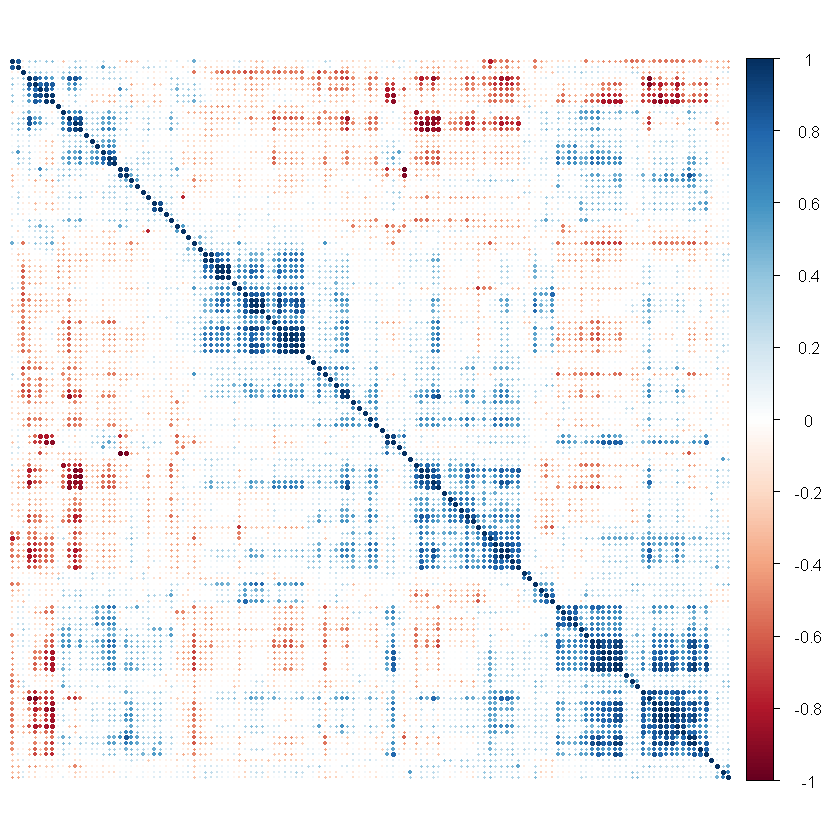

In [48]:
library(corrplot)
corrplot(rawCorr, order = "hclust", addgrid.col = NA, tl.pos = "n")
corrplot(transCorr, order = "hclust", addgrid.col = NA, tl.pos = "n")
corrplot(ssCorr, order = "hclust", addgrid.col = NA, tl.pos = "n")

In [49]:
corrInfo <- function(x) summary(x[upper.tri(x)])

In [50]:
corrInfo(rawCorr)
corrInfo(transCorr)
corrInfo(ssCorr)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.00000 -0.16173  0.06434  0.07068  0.28643  1.00000 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.98924 -0.16609  0.05929  0.06798  0.28774  1.00000 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.00000 -0.16062  0.03862  0.05561  0.25545  1.00000 

In [51]:
thresholds <- seq(.25,.95,by=0.05)
size <- meanCorr <- rep(NA,length(thresholds))
removals <- vector(mode="list",length=length(thresholds))

In [52]:
# the code below shows (for these data) the trade off between the correlation threshold, 
# the number of retained predictors, 
# and the average absolute correlation in the dat

for(i in seq_along(thresholds)){
 removals[[i]] <- findCorrelation(rawCorr, thresholds[i])
 subMat <- rawCorr[-removals[[i]], -removals[[i]]]
 size[i] <- ncol(rawCorr) -length(removals[[i]])
 meanCorr[i] <- mean(abs(subMat[upper.tri(subMat)]))
}

In [53]:
corrData <- data.frame(value = c(size, meanCorr),
                       threshold = c(thresholds, thresholds),
                       what = rep(c("Predictors", "Average Absolute Correlation"),
                                  each = length(thresholds)))

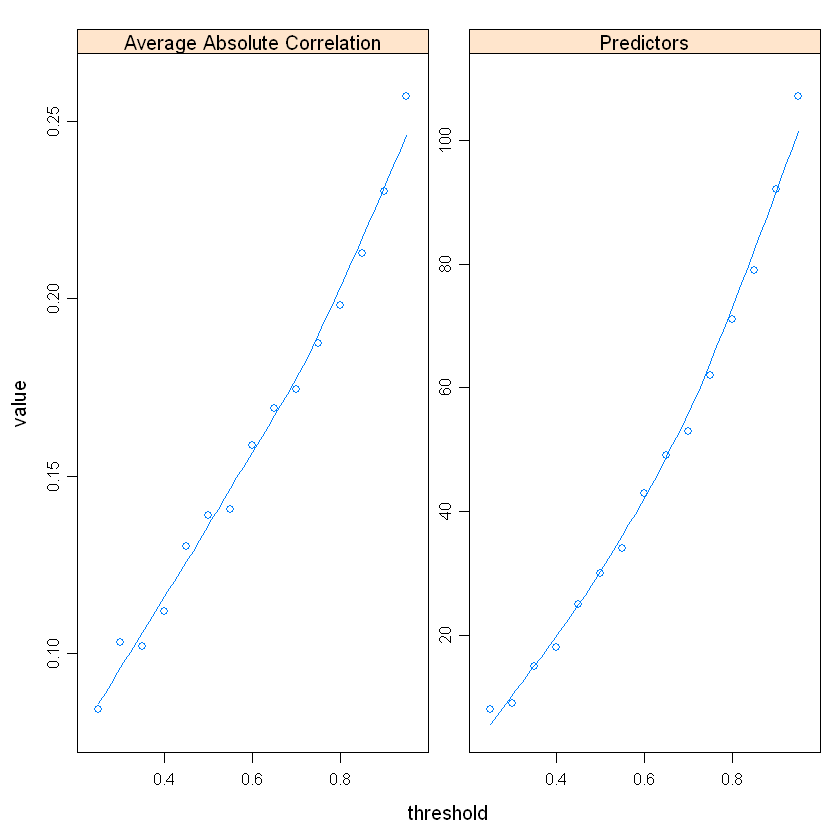

In [58]:
xyplot(value~threshold|what,data=corrData,type = c("p", "smooth"),
       scales = list(x=list(relation="free"),y=list(relation = "free")))